In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [3]:
df=pd.read_csv("diabetes.csv")
y=df['Outcome']
X=df.drop(columns='Outcome')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [4]:
pipe=Pipeline([('scale',StandardScaler()),('model',XGBClassifier(objective='binary:logistic',eval_metric='error',learning_rate=0.1,max_depth=5,n_estimators=10))])

In [5]:
pipe.fit(X_train,y_train)
best_pred=pipe.predict(X_test)
acc_sc=accuracy_score(best_pred,y_test)
print(f"Accuracy of the model: {acc_sc * 100:.2f}%")

Accuracy of the model: 79.22%


In [6]:
print(classification_report(y_test, best_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       104
           1       0.74      0.56      0.64        50

    accuracy                           0.79       154
   macro avg       0.77      0.73      0.75       154
weighted avg       0.79      0.79      0.78       154



<Axes: >

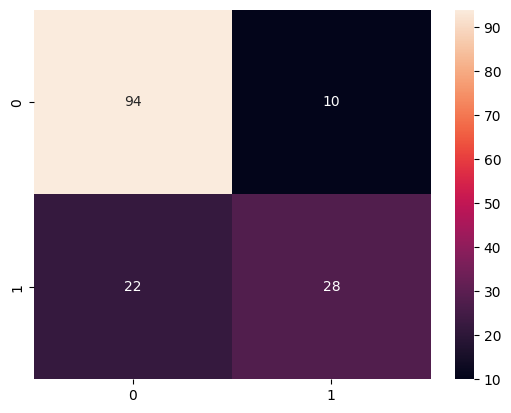

In [7]:
cm = confusion_matrix(y_test, best_pred)
sns.heatmap(cm, fmt = 'd', annot = True)